<br>
<br>
<div style="font-size:36px; font-weight:bold">NfL IC-PLA Report</div>
<br>
<div style="font-size:14px; font-weight:bold">Neurofilament Light Chain (NfL) Immuno-Complex Proximity Ligation Assay, Ref: PxK 001 </div>
<hr style="border: none; border-top: 3px solid black;">

__Scope:__ This reporting template will analyse single experiments and is designed for users who must balance their research needs with data management for large studies. For a detailed explanation of the ProxiPal package, design choices, permission structures, and user templates refer to the ProxiPal manual. We provide a jupyter notebook, not a web-server, so that users can manage their own security.  

__Features:__ While one report format is being maintained, flexibility is required to accomodate all users.  
- Use the _"Toggle Code Cells"_ button to improve readability. Advanced users can modify display tables via code cells.
- Check experimental data folders for requisite files  
- Calculate and export files csv formats that respects users with different access privileges  
- Interactive (Qgrid) tables permit sorting and filtering but cannot be saved. 
- Static (Pandas) tables are immutable and can be saved. To export to pdf or html, or to save notebook outputs with re-running the code cells, users should display pandas tables prior to saving their work.  
- Sample identification let's admin users match experiment values with sample submission information.  
- Batching let's admin users reprocess all experiments with the requisite files.  
  
<div style="font-size:16px; font-weight:bold; color:red">Hit "Run" to initialise the report</div>

In [1]:
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML, Javascript, clear_output, Image, Markdown

# from IPython.display import display, 

# Define JavaScript code
js_code = """
    function toggleCodeCells() {
        var codeCells = document.querySelectorAll('div.input');
        codeCells.forEach(function(cell) {
            if (cell.style.display !== 'none') {
                cell.style.display = 'none';
            } else {
                cell.style.display = 'block';
            }
        });
    }
"""

# Display the JavaScript code
display(HTML(f"<script>{js_code}</script>"))

# Create button and set its attributes
button = widgets.Button(description="Toggle Code Cells", layout=widgets.Layout(width='250px'))

# Define function to call the JavaScript function
def toggle_code_cells(button):
    display(Javascript("toggleCodeCells();"))

# Assign the function to the button's on_click event
button.on_click(toggle_code_cells)

# Display the button
display(button)


Button(description='Toggle Code Cells', layout=Layout(width='250px'), style=ButtonStyle())

<div style="font-size:24px; font-weight:bold">Execution environment  </div>

In [2]:
from ProxiPal import *

OS:			 Windows-10-10.0.19045-SP0
Python version:		 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Date and Time:		 2023-06-21 13:30:42
Root folder:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal
Python folder:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\python
Templates folder:	 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\templates
Data folder:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\data
Samples folder:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\samples
Quality folder:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\quality
User_downloads:		 C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\quality


# Data Folder Functions  
The __/data__ folder is general access and where users should save their experiment files. Users can access csv outputs of all displayed tables from the relevant experiment's __/exports__ folder.

## Review available experimental data  
Use this table to confirm which experiments have the requisite files for an analysis.

In [3]:
import qgrid

# Check for an eds > txt export
eds2txt_match_list, eds2txt_match_dict = find_matched_filenames(base_path, read_export = True)
# Check for a csv file with the same name as the eds file
eds2csv_match_list, eds2csv_match_dict = find_matched_filenames(base_path, native_format = '.eds', export_format = '.csv', read_export = True)
# Review matched filenames
df_pivot = review_matched_filenames(eds2txt_match_dict, eds2csv_match_dict)
# Create a df_pivot without the path_key column for display purposes
df_without_path_key = df_pivot.drop(columns="path_key")

# Define column options and definitions
col_options = {'width': 100}
col_defs = {
    'index': {'width': col_options['width'] / 15},
    'experiment': {'width': col_options['width'] / 1.3},
    'eds filename': {'width': 3 * col_options['width']},
    'txt': {'width': col_options['width'] / 4},
    'csv': {'width': col_options['width'] / 4},
    'analysis': {'width': col_options['width'] / 2.4},
}

# Grid options: disable addition and deletion of rows
grid_options = {
    'enableColumnReorder': True,
    'enableTextSelectionOnCells': True,
    'editable': False,
    'autoEdit': False,
    'explicitInitialization': True,
    'maxVisibleRows': 15,
    'minVisibleRows': 8,
    'sortable': True,
    'filterable': True,
    'highlightSelectedCell': False,
    'highlightSelectedRow': True
}

def display_qgrid_table_rev(button):
    # Create qgrid widget
    qgrid_widget = qgrid.show_grid(df_without_path_key, 
                                show_toolbar=False,  # disables toolbar
                                grid_options=grid_options,  # pass grid options
                                column_options=col_options, 
                                column_definitions=col_defs)
    # Hide the index column
    qgrid_widget.layout = widgets.Layout(overflow='hidden')
    qgrid_widget._update_df()
    # Display the widget
    clear_output()
    print("Data files reviewed on: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))
    display(button_box_rev)
    display(qgrid_widget)

def display_pandas_table_rev(button):
    clear_output()
    print("Data files reviewed on: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))
    display(button_box_rev)
    pd.set_option('display.max_rows', None)
    display(df_without_path_key)

# Create buttons
button_qgrid_rev = widgets.Button(description="Qgrid Checklist", layout=widgets.Layout(width='250px'))
button_pandas_rev = widgets.Button(description="Pandas Checklist", layout=widgets.Layout(width='250px'))

# Connect buttons to functions
button_qgrid_rev.on_click(display_qgrid_table_rev)
button_pandas_rev.on_click(display_pandas_table_rev)

# Create a horizontal box with your buttons
button_box_rev = widgets.HBox([button_qgrid_rev, button_pandas_rev])

# Display the box
display(button_box_rev)


Data files reviewed on:  Wednesday 21/06/23 13:30


Ext               experiment analysis  \
0           221208_e21_kruti   230130   
1           230112_e23_kruti   230224   
2           230112_e24_kruti   230410   
3           230125_e25_kruti   230415   
4           230125_e26_kruti   230415   
5           230202_e27_kruti   230420   
6     230321_MRFF-LOB1_kruti   230405   
7     230321_MRFF-LOB2_kruti   230405   
8     230321_MRFF-LOB3_kruti   230405   
9    230321_MRFF-Prec1_kruti   230405   
10   230321_MRFF-Prec2_kruti   230405   
11   230321_MRFF-Prec3_kruti   230405   
12      230324_MRFF_e1_kruti   230410   
13      230324_MRFF_e2_kruti   230410   

Ext                                       eds filename   txt   csv  
0    2022_12_08 Expt21 endoNfL_ICPLA_36cap_79SLC171...  True  True  
1    2023_01_12 Expt23 endoNfL_ICPLA_36cap_79SLC171...  True  True  
2    2023_01_12 Expt24 endoNfL_ICPLA_36cap_79SLC171...  True  True  
3    2023_01_25 Expt25 endoNfL_ICPLA_36cap_79_71_LP...  True  True  
4    2023_01_25 Expt26 endoNfL_ICPLA_36cap_79_71_LP...  True  True  
5    2023_02_02 Expt27 endoNfL_ICPLA_36cap_79_71_LP...  True  True  
6                               230321_MRFF-LOB1_kruti  True  True  
7                               230321_MRFF-LOB2_kruti  True  True  
8                               230321_MRFF-LOB3_kruti  True  True  
9                              230321_MRFF-Prec1_kruti  True  True  
10                             230321_MRFF-Prec2_kruti  True  True  
11                             230321_MRFF-Prec3_kruti  True  True  
12             Plate 1_NfL_MRFF_Dhama Plasma 1s to 20s  True  True  
13            Plate 2_NfL_MRFF_Dhama Plasma 21s to 40s  True  True

## Link Experiment Data and Instrument Parameters  
Experimental data from the user-submitted csv/xlsx files are matched to qPCR instrument parameters that are extracted from a .txt export file.
- Matching to instrument parameters is presently only supported for ABI Quant Studio software.
- Users of non-ABI instruments can still analyse data without instrument parameters being recorded (see ProxiPal manual).

In [4]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Column names of interest
columns_of_interest = ['filepath_txt', 'Kit_#', 'InstrumentType', 'ExperimentRunStartTime',
                       'QuantificationCycleMethod', 'Stage/CyclewhereAnalysisisperformed',
                       'Chemistry', 'PassiveReference', 'BlockType', 'InstrumentSerialNumber']

# Create input text field
style = {'description_width': 'initial'}
input_text = widgets.IntText(description='Select experiment index to analyze:', value=9999, style=style)

# Create a button
button_params = widgets.Button(description='Link CSV & EDS data',
                               layout=widgets.Layout(width='250px'))

# Define your function
def pandas_link_params(path_key):
    # Assuming the function ProxiPal.create_data_metatable is already defined
    meta_list = create_data_metatable(eds2txt_match_dict, eds2csv_match_dict, path_key)

    # Calibration columns
    calibration_columns = ['CalibrationBackgroundisexpired', 'CalibrationPureDyeROXisexpired',
                           'CalibrationPureDyeSYBRisexpired', 'CalibrationRNasePisexpired',
                           'CalibrationROIisexpired', 'CalibrationUniformityisexpired']

    # Initialize a new DataFrame
    new_df = pd.DataFrame(columns=['Parameter', 'Status'])

    # Populate the new DataFrame
    for col in columns_of_interest:
        if col in meta_list[0].columns:
            unique_values = meta_list[0][col].dropna().unique()  # Get unique values excluding NaNs
            unique_values_str = ', '.join(map(str, unique_values))  # Convert to string and join with commas
            new_row = pd.DataFrame({'Parameter': [col], 'Status': [unique_values_str]})
            new_df = pd.concat([new_df, new_row], ignore_index=True)
        else:
            print(f"Column '{col}' not found in the DataFrame.")

    # Calibration check
    calibration_status = []
    for col in calibration_columns:
        if (meta_list[0][col] != 'No').any():  # If any value in the column is not 'No'
            calibration_status.append(col.replace('Calibration', '').replace('isexpired', ''))
    if len(calibration_status) == 0:
        new_row = pd.DataFrame({'Parameter': ['Calibration Check'], 'Status': ['OK']})
        new_df = pd.concat([new_df, new_row], ignore_index=True)
    else:
        status_str = ', '.join(calibration_status)
        new_row = pd.DataFrame({'Parameter': ['Calibration Check'],
                                'Status': ['Calibration expired: ' + status_str]})
        new_df = pd.concat([new_df, new_row], ignore_index=True)

    display(new_df.style.set_properties(subset=['Status'], **{'width': '650px'}))

# Define what happens when the button is clicked
def button_link_params(b):
    # Disable the button
    button_params.disabled = True
    # Fetch the path_key from df_pivot based on input_text value
    path_key = df_pivot.at[input_text.value, 'path_key']
    pandas_link_params(path_key)
    print("CSV & EDS Link Complete:", datetime.now().strftime("%A %d/%m/%y %H:%M"))

# Set the on_button_clicked function to be called when the button is clicked
button_params.on_click(button_link_params)

# Create a horizontal box with the text field and the button
hbox = widgets.HBox([input_text, button_params])

# Display the horizontal box
display(hbox)


CSV & EDS Link Complete: Wednesday 21/06/23 13:31


## Show Experiment Plan  
Experiment plans are extracted from the user-submitted csv/xlsx planning template.

In [5]:
def show_plan(button):
    # Disable the button
    button_plan.disabled = True
    
    #     Use the input_text value from the previous cell
    input = input_text.value
    exports_path = Path(data_folder / df_pivot['experiment'][input] / df_pivot['analysis'][input] / "exports")
    metatable = pd.read_csv(exports_path / "metatable.csv")

    unique_values = metatable["experiment_plan"].unique().tolist()
    list_of_strings = [f"{i+1}. {value}" for i, value in enumerate(unique_values[0].split('\n'))]

    display(Markdown('\n'.join(list_of_strings)))

button_plan = widgets.Button(description="Show Experiment Plans", layout=widgets.Layout(width='250px'))
button_plan.on_click(show_plan)
display(button_plan)


Button(description='Show Experiment Plans', layout=Layout(width='250px'), style=ButtonStyle())

1. NfL IC PLA: RTU Plates made 01/01//2023 (10P) use 1P for IMD from plasma #3 Red X
2. MRD =1:10 for Plasma samples
3. RTU abcam NfL in AD8 2000,500,125,32,8,2,0.5, 0- pg/ml
4. RTU Progen NfL in AD8 2000,500,125,32,8,2,0.5, 0- pg/ml
5. RTU Progen NfL in 1:10 IMP RedX Plasma#3 in AD8 2000,500,125,32,8,2,0.5, 0- pg/ml
6. EndoQC1 to EndoQC4 NfL= DHP2 (170pg/mL_PL); DHP12 ( 129), DHP10(16); RMH11 43B(900_PL done) (DO DILN FACTOR 10x)
7. Dhama EDTA plasma got March 2023 all samples 1:10 (DO DILUTION FACTOR 10x)
8. Transfer 150ul to sampling plate total 12 lanes (for 2P)
9. Make 79SLC1 71SLC2 detection antibodies @500ng/mL (50+50+900AD8) Final @25ng/mL in the reaction mix (RTU @-20@10ug/mL) (7.8ul in 150ul reaction mix) (No FT)
10. Form complex with Ab-SLC probes= 1.5h at 25deg mixing at 650rpm(on thermo mixer) and add to BLOCKED, STABILISED capture #36 RTU plate; spin; MIX 15-30mins; spin again and then 4deg o/n 
11. Next day wash the plate to remove Ab1Ab2-excess and sample. Wash the plate 30mins. No mixing on thermoshaker for washes and add the Master mix. Prefinal only with TBS
12. SYBR T4 thermo ligase master mix 
13. Read on Quant12B

## Show Amplification and Melt Curve Plots  
Reaction plots are best viewed in the qPCR instrument software but users can display them here by exporting to the experiment folder; "Amplification Plot.jpg" and "Melt Curve Plot.jpg".

Button(description='Display qPCR Plots', layout=Layout(width='250px'), style=ButtonStyle())

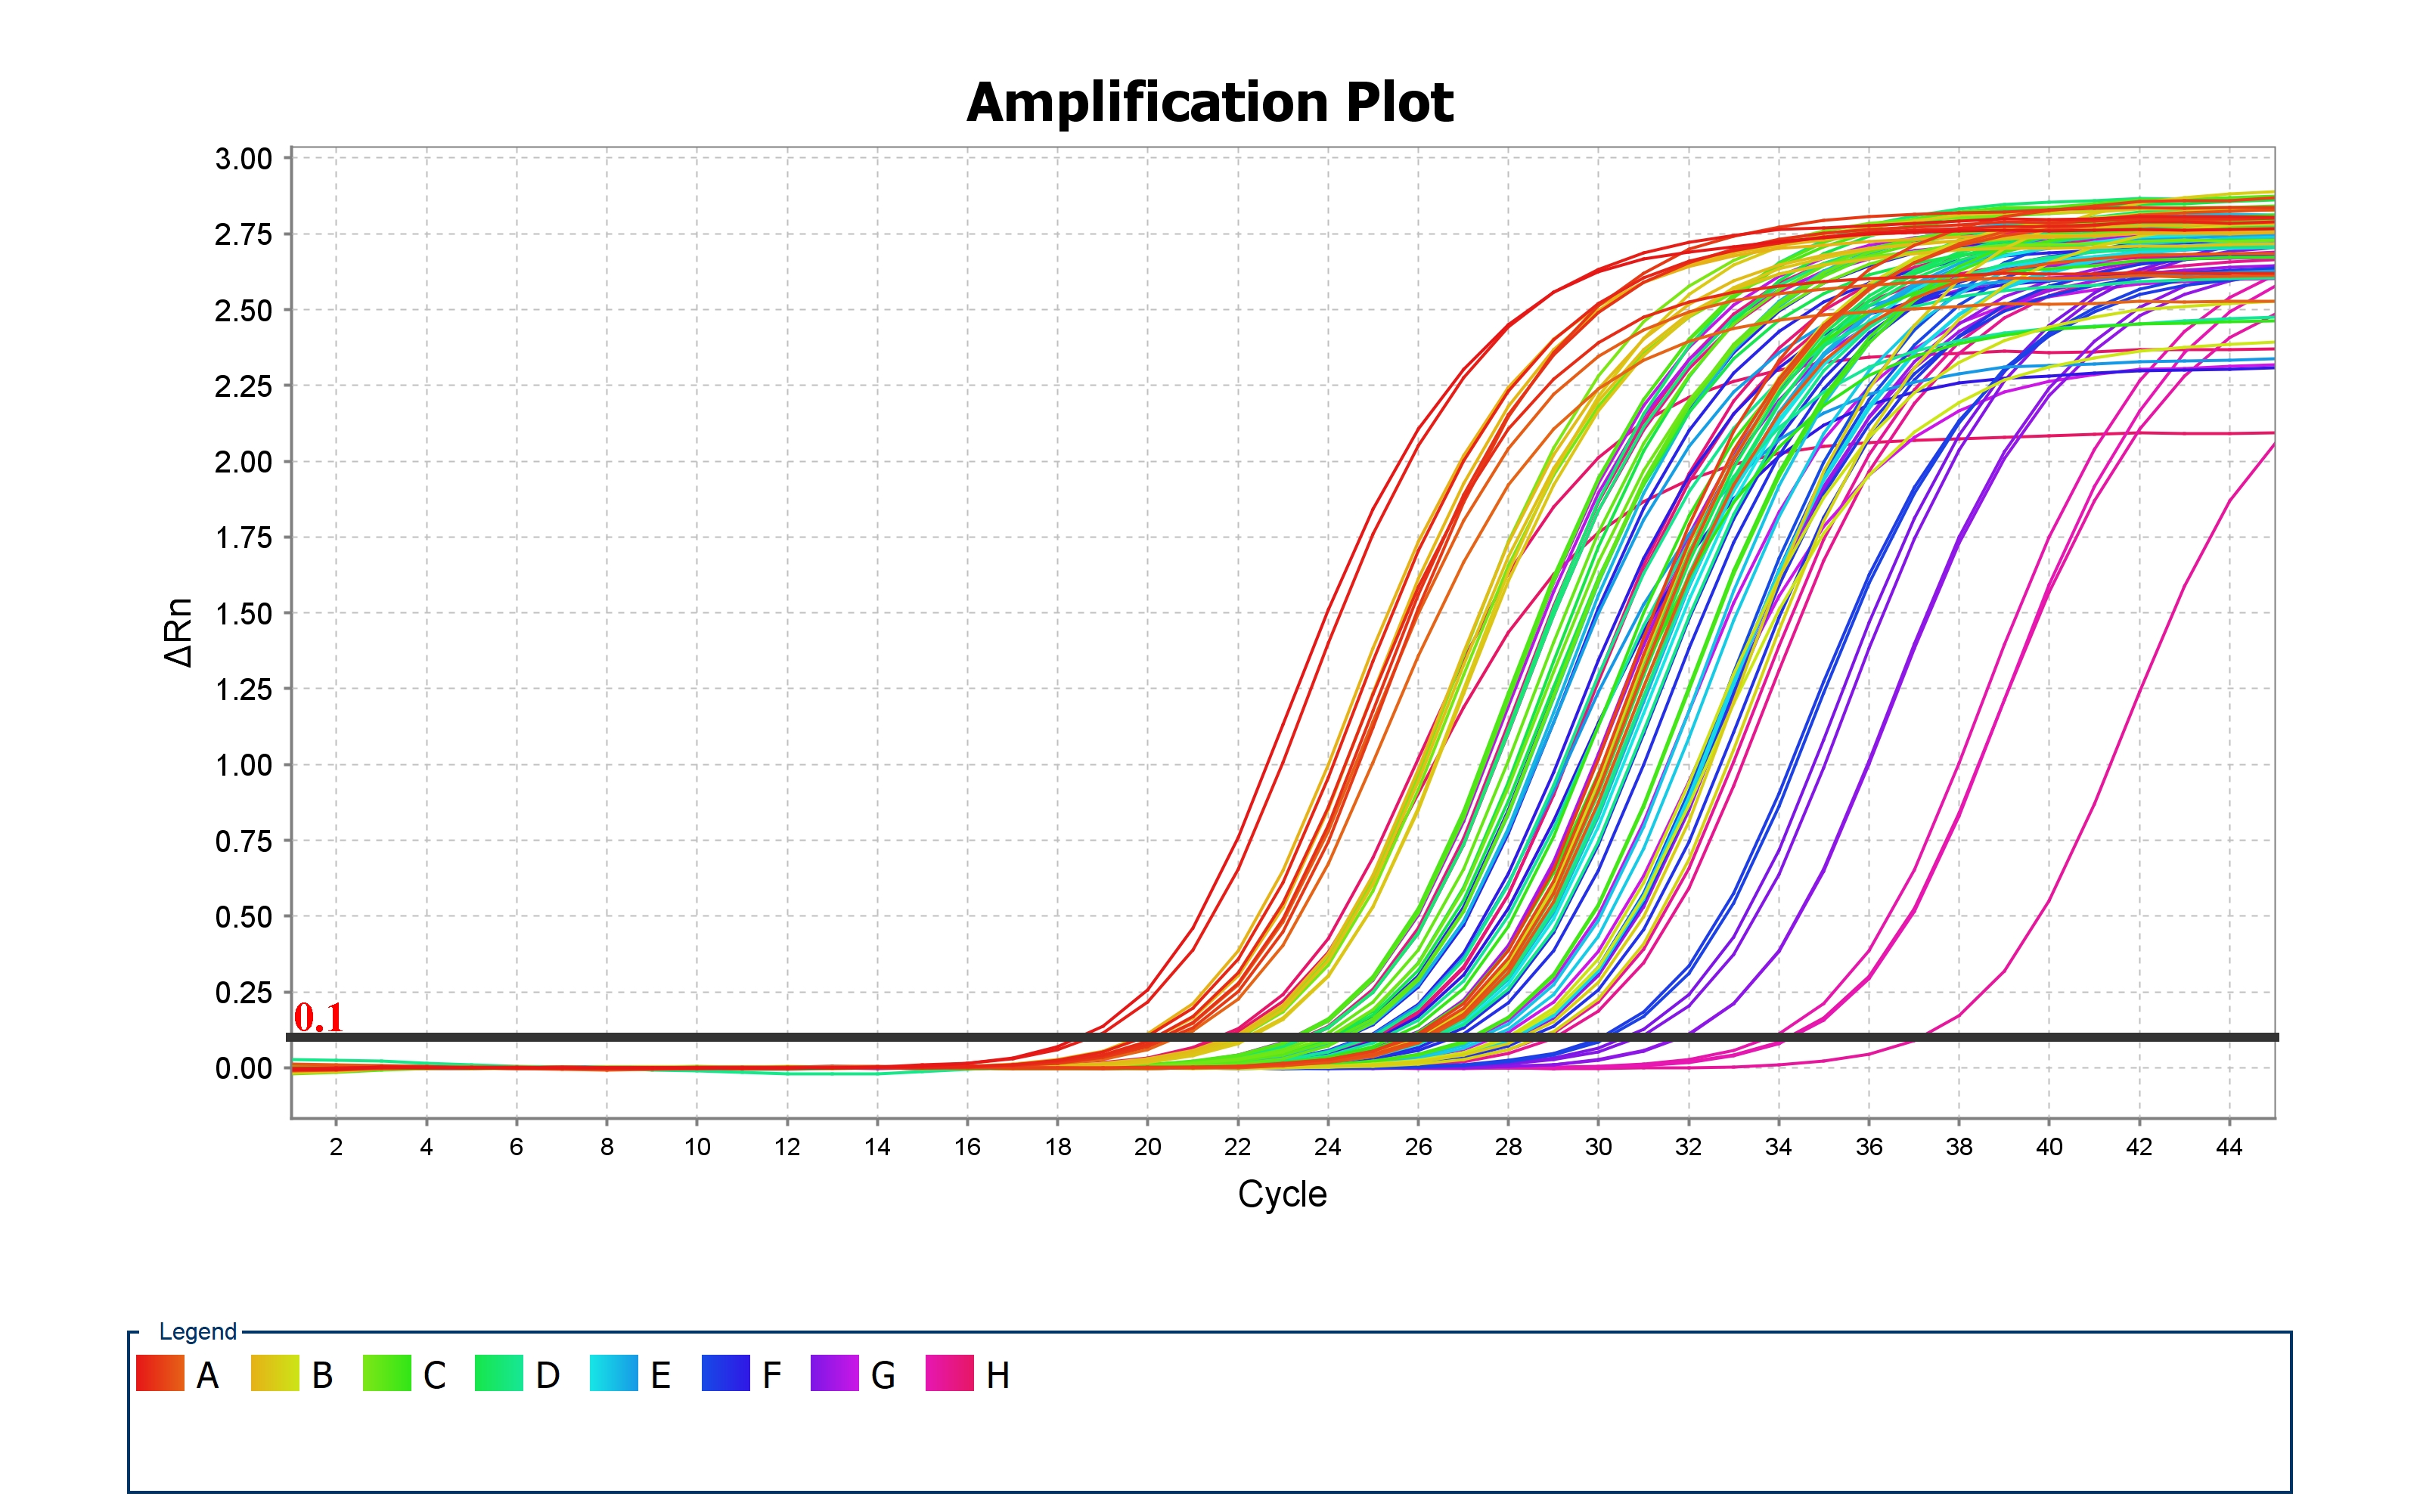

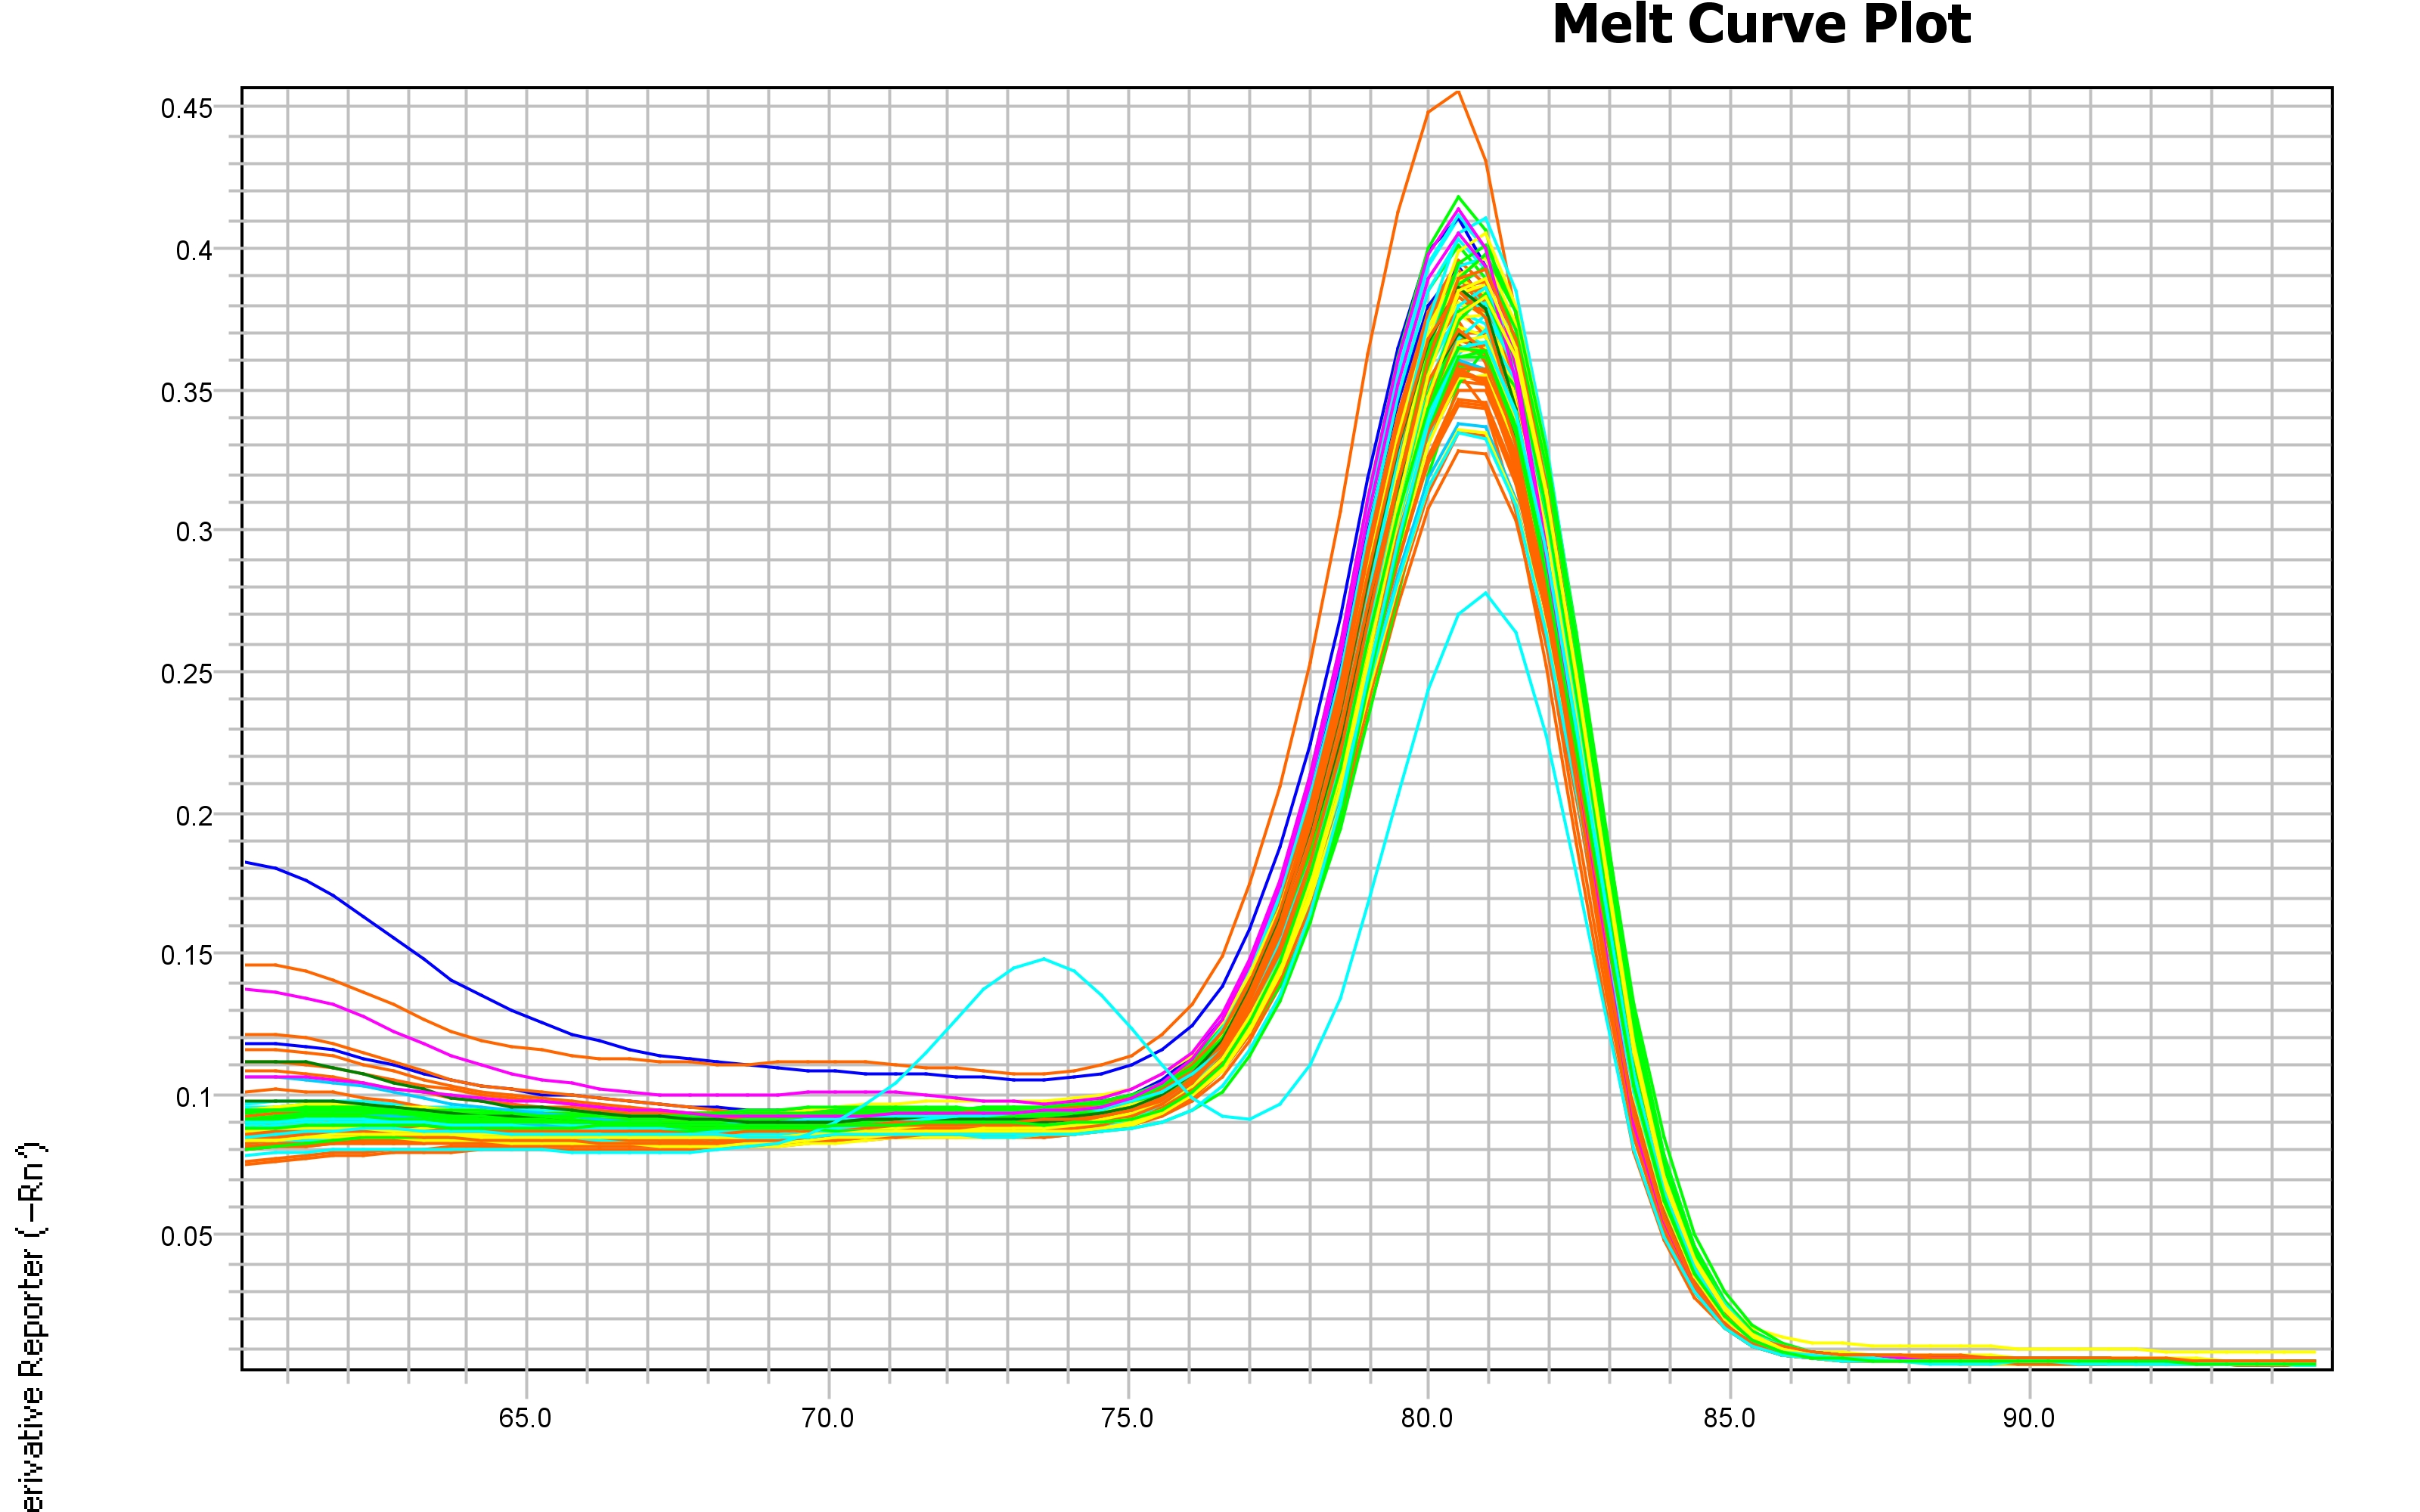

Plots displayed on:  Wednesday 21/06/23 13:31


In [6]:
def display_jpegs(button):
    # Disable the button
    button_jpegs.disabled = True
    
    input = input_text.value
    experiment_folder = Path(data_folder / df_pivot['experiment'][input] / df_pivot['analysis'][input])
    amp_plot = experiment_folder / 'Amplification Plot.jpg'
    melt_plot = experiment_folder / 'Melt Curve Plot.jpg'
    
    if amp_plot.is_file():
        display(Image(filename=amp_plot))
    else:
        print("Amplification Plot.jpg not found!")

    if melt_plot.is_file():
        display(Image(filename=melt_plot))
    else:
        print("Melt Curve Plot.jpg not found!")
        
    print("Plots displayed on: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))

# Create a button
button_jpegs = widgets.Button(description="Display qPCR Plots", layout=widgets.Layout(width='250px'))

# Assign the function to the button's on_click event
button_jpegs.on_click(display_jpegs)

# Display the button
display(button_jpegs)


## Calculate Concentrations  
This section applies python methods from the numpy, pandas, scikit-learn and plotly packages. Calculations do not modify user-submitted files, and all calculated tables are saved to the relevant __/exports__ folder.

### Apply Linear Regression  
The NFL IC-PLA qPCR demonstrates excellent linearity and parallelism with respect to NfL concentration. For this reason qPCR standards of quantitation can be reliably applied.

In [7]:
# Create a second button
button_lin_reg = widgets.Button(description='Apply Linear Regression',
                         layout=widgets.Layout(width='250px'))

# Define the function to run when the second button is clicked
def apply_lin_reg(b):
    # Disable the button
    button_lin_reg.disabled = True
    
#   Use the input_text value from the previous cell
    input = input_text.value
    path = Path(data_folder / df_pivot['experiment'][input] / df_pivot['analysis'][input] / "exports" / "metatable.csv")
    metatable = pd.read_csv(path)
    std_calc_dict = calc_metatable_std_lin_reg(metatable)
    print("Standards calculated: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))

# Set the on_button2_clicked function to be called when the second button is clicked
button_lin_reg.on_click(apply_lin_reg)


# Display the second button
display(button_lin_reg)

Button(description='Apply Linear Regression', layout=Layout(width='250px'), style=ButtonStyle())

Standards calculated:  Wednesday 21/06/23 13:31


### Display Standard Curves  
Automated calculations are prefixed with "py_" and all standard curve assignments should be made by users in the csv/xlsx tableson a per well basis.  
- Users should assign consistent threshold value for all reactions when exporting Ct values; for ABI systems we use 0.1 with the SYBR assays.

In [8]:
# Create a button
button_show_standards = widgets.Button(description="Display Standards", 
                        layout=widgets.Layout(width='250px'))

def process_csv_files(folder):
    # Ensure the folder is a Path object
    folder = Path(folder)

    # Initialize an empty dictionary
    csv_dict = {}

    # Iterate over the files in the folder
    for filename in folder.iterdir():
        # If the filename contains the substring "py_std" and ends with ".csv"
        if "py_std" in filename.name and filename.suffix == ".csv":
            # Read the CSV file into a DataFrame and add it to the dictionary
            csv_dict[filename.name] = pd.read_csv(filename)

    # Iterate over the list ['1', '2', '3', '4']
    for number in ['1', '2', '3', '4']:
        # Construct the filename
        plot_filename = f"py_std{number}_plot_table.csv"
        # If the filename is in the dictionary
        if plot_filename in csv_dict:
            # Run the function plot_LinReg with the corresponding DataFrame
            plot_LinReg(csv_dict[plot_filename], 500, 320)
            
            # Print PCR efficiency
            pcr_eff_values = csv_dict[plot_filename]['py_PCReff'].unique()
            pcr_eff_values_string = ', '.join(map(lambda x: str(x) + '%', pcr_eff_values))
            print("PCR efficiency:", pcr_eff_values_string)
            
        table_filename = f"py_std{number}_report_table.csv"
        
        if table_filename in csv_dict:
            display(csv_dict[table_filename])

# Define a function to be called when the button is clicked
def show_standards(event):
    # Disable the button
    button_show_standards.disabled = True
    
    # Substitute 'your_folder_path' with the path to your folder
    exports_path = Path(data_folder / df_pivot['experiment'][input_text.value] / df_pivot['analysis'][input_text.value] / "exports")
    process_csv_files(exports_path)
    print("Data displayed on: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))

# Attach the function to the button
button_show_standards.on_click(show_standards)

# Display the button
display(button_show_standards)


Button(description='Display Standards', layout=Layout(width='250px'), style=ButtonStyle())

PCR efficiency: 97.94%


sample_id position               ct  py_mean_ct  \
0    std1[2000]_abcam#ab224840  A1 / A2    18.558 / 18.8     18.6790   
1     std1[500]_abcam#ab224840  B1 / B2  19.861 / 20.262     20.0615   
2     std1[125]_abcam#ab224840  C1 / C2  21.978 / 22.096     22.0370   
3   std1[31.25]_abcam#ab224840  D1 / D2  24.091 / 24.179     24.1350   
4  std1[7.8125]_abcam#ab224840  E1 / E2  26.445 / 26.278     26.3615   
5  std1[1.9531]_abcam#ab224840  F1 / F2  28.136 / 28.178     28.1570   
6  std1[0.4883]_abcam#ab224840  G1 / G2  30.662 / 30.918     30.7900   
7       std1[0]_abcam#ab224840  H1 / H2  34.357 / 33.853     34.1050   

   py_known_conc  py_mean_ng/L  py_mean_recovery  
0      2000.0000     1468.2772              0.73  
1       500.0000      571.2768              1.14  
2       125.0000      148.2652              1.19  
3        31.2500       35.3921              1.13  
4         7.8125        7.7387              0.99  
5         1.9531        2.2711              1.16  
6         0.4883        0.3762              0.77  
7         0.0000        0.0391               NaN

PCR efficiency: 99.95%


sample_id position               ct  py_mean_ct  \
0    std2[2000]_progen#62008  A3 / A4  19.965 / 20.231     20.0980   
1     std2[500]_progen#62008  B3 / B4  21.867 / 22.048     21.9575   
2     std2[125]_progen#62008  C3 / C4  24.004 / 23.816     23.9100   
3   std2[31.25]_progen#62008  D3 / D4  26.164 / 26.052     26.1080   
4  std2[7.8125]_progen#62008  E3 / E4  28.152 / 28.223     28.1875   
5  std2[1.9531]_progen#62008  F3 / F4  30.255 / 30.103     30.1790   
6  std2[0.4883]_progen#62008  G3 / G4  31.869 / 31.859     31.8640   
7       std2[0]_progen#62008  H3 / H4   34.28 / 37.202     35.7410   

   py_known_conc  py_mean_ng/L  py_mean_recovery  
0      2000.0000     1923.1296              0.96  
1       500.0000      530.1875              1.06  
2       125.0000      137.0452              1.10  
3        31.2500       29.8827              0.96  
4         7.8125        7.0735              0.91  
5         1.9531        1.7797              0.91  
6         0.4883        0.5537              1.13  
7         0.0000        0.0377               NaN

PCR efficiency: 116.43%


sample_id position               ct  py_mean_ct  \
0    std3[2000]_progen#62008  A5 / A6  20.426 / 20.598     20.5120   
1     std3[500]_progen#62008  B5 / B6  22.277 / 22.345     22.3110   
2     std3[125]_progen#62008  C5 / C6  24.467 / 24.295     24.3810   
3   std3[31.25]_progen#62008  D5 / D6  26.256 / 26.067     26.1615   
4  std3[7.8125]_progen#62008  E5 / E6   27.658 / 27.47     27.5640   

   py_known_conc  py_mean_ng/L  py_mean_recovery  
0      2000.0000     2132.3673              1.07  
1       500.0000      531.6326              1.06  
2       125.0000      107.5197              0.86  
3        31.2500       27.1920              0.87  
4         7.8125        9.2076              1.18

Data displayed on:  Wednesday 21/06/23 13:31


### Display Samples  
Displays the sample report table generated during concentration calculation.

In [9]:
# Create the buttons
button_qgrid_samples = widgets.Button(description="Qgrid Sample Table", layout=widgets.Layout(width='250px'))
button_pandas_samples = widgets.Button(description="Pandas Sample Table", layout=widgets.Layout(width='250px'))

# Define the data display function for Qgrid Sample Table
def process_and_display_dataframe(event):
    input_val = input_text.value
    exports_path = Path(data_folder / df_pivot['experiment'][input_val] / df_pivot['analysis'][input_val] / "exports")
    
    # Fetch sample report table
    sample_report_table = pd.read_csv(exports_path / 'sample_report_table.csv')
    
    # Clear previous output
    clear_output()
    
    # Display the Qgrid table
    print('Data displayed is available at: \n' + str(exports_path / 'sample_report_table.csv'))
    display(widgets.HBox([button_qgrid_samples, button_pandas_samples]))
    display(qgrid.show_grid(sample_report_table, show_toolbar=False))

# Define the data display function for Pandas Sample Table
def display_pandas_dataframe(event):
    input_val = input_text.value
    exports_path = Path(data_folder / df_pivot['experiment'][input_val] / df_pivot['analysis'][input_val] / "exports")
    
    # Fetch sample report table
    sample_report_table = pd.read_csv(exports_path / 'sample_report_table.csv')
    
    # Clear previous output
    clear_output()
    
    # Display the Pandas table
    print('Data displayed is available at: \n' + str(exports_path / 'sample_report_table.csv'))
    display(widgets.HBox([button_qgrid_samples, button_pandas_samples]))
    pd.set_option('display.max_rows', None)
    display(sample_report_table)

# Assign the event handlers to the buttons
button_qgrid_samples.on_click(process_and_display_dataframe)
button_pandas_samples.on_click(display_pandas_dataframe)

# Display the buttons
display(widgets.HBox([button_qgrid_samples, button_pandas_samples]))


Data displayed is available at: 
C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\data\230324_MRFF_e1_kruti\230410\exports\sample_report_table.csv


sample_id     tube_id   position target  usr_ignore  \
0                BY0043  NUOH631626    H7 / H8    NfL           0   
1                BY0045  NUOH633068   B9 / B10    NfL           0   
2                BY0046  NUOH626828   A9 / A10    NfL           0   
3                BY0048  NUOH469384   C9 / C10    NfL           0   
4                BY0049  NUOH469861   D9 / D10    NfL           0   
5                BY0052  NUOH505385   E9 / E10    NfL           0   
6                BY0053  NUOH499631   F9 / F10    NfL           0   
7                BY0054  NUOH417558   G9 / G10    NfL           0   
8                BY0056  NUOH416115   H9 / H10    NfL           0   
9         MiND11007CM-1  NUOM607448  C11 / C12    NfL           0   
10        MiND11008EF-1  NUOM616570  B11 / B12    NfL           0   
11        MiND12022GW-1  NUOL163877  A11 / A12    NfL           0   
12        MiND12030JC-1  NUOG006470    C7 / C8    NfL           0   
13        MiND12039CB-1  NUOG017041    D7 / D8    NfL           0   
14        MiND12053BB-1  NUOG017519    E7 / E8    NfL           0   
15        MiND12074VU-1  NUPI561448  D11 / D12    NfL           0   
16        MiND12089CT-1  NUOM933370    G7 / G8    NfL           0   
17        MiND12092MS-1  NUOL768645    A7 / A8    NfL           0   
18        MiND25006MD-1  NUOM788895    F7 / F8    NfL           0   
19        MiND25023RR-1  NUPI557366    B7 / B8    NfL           0   
20    S5 EQC1_DHP2 MRFF         NaN  E11 / E12    NfL           0   
21   S6 EQC2_DHP12 MRFF         NaN  F11 / F12    NfL           0   
22   S7 EQC3_DHP10 MRFF         NaN  G11 / G12    NfL           0   
23  S8 EQC4_RMH43B MRFF         NaN  H11 / H12    NfL           0   

                 ct  usr_mean_ng/L  py_mean_ct  py_mean_ng/L    calibrator  
0   23.604 / 23.557       1722.421     23.5805     1722.0738  progen#62008  
1   26.089 / 26.123        299.299     26.1060      299.2580  progen#62008  
2   26.191 / 26.291        272.716     26.2410      272.5334  progen#62008  
3   27.299 / 27.242        133.575     27.2705      133.5394  progen#62008  
4   26.317 / 26.453        246.943     26.3850      246.6525  progen#62008  
5   26.316 / 26.321        258.302     26.3185      258.2840  progen#62008  
6   24.486 / 24.257        998.641     24.3715      995.4371  progen#62008  
7   23.369 / 23.315       2032.031     23.3420     2031.5347  progen#62008  
8   25.135 / 25.096        594.552     25.1155      594.4561  progen#62008  
9   25.534 / 25.784        409.468     25.6590      407.9085  progen#62008  
10  27.993 / 28.065         78.980     28.0290       78.9499  progen#62008  
11  20.444 / 20.749      13692.597     20.5965    13615.5601  progen#62008  
12  23.365 / 23.308       2039.831     23.3365     2039.2919  progen#62008  
13  23.595 / 23.597       1703.796     23.5960     1703.6772  progen#62008  
14  24.322 / 24.442        989.144     24.3820      988.2209  progen#62008  
15  24.968 / 25.344        582.957     25.1560      578.0055  progen#62008  
16    25.762 / 25.8        374.901     25.7810      374.8426  progen#62008  
17   25.864 / 25.95        343.680     25.9070      343.5037  progen#62008  
18  26.838 / 26.602        196.224     26.7200      195.5568  progen#62008  
19  28.392 / 28.776         54.225     28.5840       53.7445  progen#62008  
20  24.411 / 24.888        832.316     24.6495      821.0214  progen#62008  
21  24.868 / 25.231        627.245     25.0495      622.2736  progen#62008  
22  27.345 / 27.779        110.359     27.5620      109.1158  progen#62008  
23  21.621 / 21.755       6398.309     21.6880     6390.9771  progen#62008

### Display Well Table  
Displays the a filtered version of the py_metatable table generated during concentration calculation.

In [10]:
# Create the buttons
button_qgrid_well = widgets.Button(description="Qgrid Well Table", layout=widgets.Layout(width='250px'))
button_pandas_well = widgets.Button(description="Pandas Well Table", layout=widgets.Layout(width='250px'))

# Define the data display function for Qgrid Well Table
def display_qgrid_well_table(event):
    input_val = input_text.value
    exports_path = Path(data_folder / df_pivot['experiment'][input_val] / df_pivot['analysis'][input_val] / "exports")
    py_metatable = pd.read_csv(exports_path / 'py_metatable.csv')
    
    well_table = py_metatable[['position', 'target', 'usr_ignore','ct','py_mean_ct',  'tm', 'rep_id', 'dilution', 'usr_raw_ng/L', 'py_raw_ng/L', 
                               'py_raw_recovery', 'py_mean_ng/L']]
    
    # Clear previous output
    clear_output()
    
    # Display the Qgrid table
    print('Data displayed is available at: \n' + str(exports_path / 'py_metatable.csv'))
    display(widgets.HBox([button_qgrid_well, button_pandas_well]))
    display(qgrid.show_grid(well_table, show_toolbar=False))

# Define the data display function for Pandas Well Table
def display_pandas_well_table(event):
    input_val = input_text.value
    exports_path = Path(data_folder / df_pivot['experiment'][input_val] / df_pivot['analysis'][input_val] / "exports")
    py_metatable = pd.read_csv(exports_path / 'py_metatable.csv')
    well_table = py_metatable[['position', 'target', 'usr_ignore','ct','py_mean_ct',  'tm', 'rep_id', 'dilution', 'usr_raw_ng/L', 'py_raw_ng/L', 
                               'py_raw_recovery', 'py_mean_ng/L', 'calibrator']]
    
    # Clear previous output
    clear_output()
    
    # Display the Pandas table
    print('Data displayed is available at: \n' + str(exports_path / 'py_metatable.csv'))
    display(widgets.HBox([button_qgrid_well, button_pandas_well]))
    pd.set_option('display.max_rows', None)
    display(well_table)

# Assign the event handlers to the buttons
button_qgrid_well.on_click(display_qgrid_well_table)
button_pandas_well.on_click(display_pandas_well_table)

# Display the buttons
display(widgets.HBox([button_qgrid_well, button_pandas_well]))


Data displayed is available at: 
C:\Users\smith.j\MEGA\MEGAsync\COLONIAL\ProxiPal\data\230324_MRFF_e1_kruti\230410\exports\py_metatable.csv


position target  usr_ignore      ct  py_mean_ct    tm  rep_id  dilution  \
0        A1    NfL           0  18.558     18.6790  80.7       1         1   
1        A2    NfL           0  18.800     18.6790  80.5       1         1   
2        A3    NfL           0  19.965     20.0980  80.5       2         1   
3        A4    NfL           0  20.231     20.0980  80.5       2         1   
4        A5    NfL           0  20.426     20.5120  80.7       3         1   
5        A6    NfL           0  20.598     20.5120  80.7       3         1   
6        A7    NfL           0  25.864     25.9070  80.7       4        10   
7        A8    NfL           0  25.950     25.9070  80.7       4        10   
8        A9    NfL           0  26.191     26.2410  80.5       5        10   
9       A10    NfL           0  26.291     26.2410  80.5       5        10   
10      A11    NfL           0  20.444     20.5965  80.5       6        10   
11      A12    NfL           0  20.749     20.5965  80.5       6        10   
12       B1    NfL           0  19.861     20.0615  80.7       7         1   
13       B2    NfL           0  20.262     20.0615  80.5       7         1   
14       B3    NfL           0  21.867     21.9575  80.5       8         1   
15       B4    NfL           0  22.048     21.9575  80.5       8         1   
16       B5    NfL           0  22.277     22.3110  80.5       9         1   
17       B6    NfL           0  22.345     22.3110  80.7       9         1   
18       B7    NfL           0  28.392     28.5840  80.7      10        10   
19       B8    NfL           0  28.776     28.5840  80.7      10        10   
20       B9    NfL           0  26.089     26.1060  80.5      11        10   
21      B10    NfL           0  26.123     26.1060  80.5      11        10   
22      B11    NfL           0  27.993     28.0290  80.5      12        10   
23      B12    NfL           0  28.065     28.0290  80.5      12        10   
24       C1    NfL           0  21.978     22.0370  80.7      13         1   
25       C2    NfL           0  22.096     22.0370  80.7      13         1   
26       C3    NfL           0  24.004     23.9100  80.7      14         1   
27       C4    NfL           0  23.816     23.9100  80.7      14         1   
28       C5    NfL           0  24.467     24.3810  80.7      15         1   
29       C6    NfL           0  24.295     24.3810  80.7      15         1   
30       C7    NfL           0  23.365     23.3365  80.7      16        10   
31       C8    NfL           0  23.308     23.3365  80.7      16        10   
32       C9    NfL           0  27.299     27.2705  80.7      17        10   
33      C10    NfL           0  27.242     27.2705  80.5      17        10   
34      C11    NfL           0  25.534     25.6590  80.5      18        10   
35      C12    NfL           0  25.784     25.6590  80.5      18        10   
36       D1    NfL           0  24.091     24.1350  81.0      19         1   
37       D2    NfL           0  24.179     24.1350  80.7      19         1   
38       D3    NfL           0  26.164     26.1080  80.7      20         1   
39       D4    NfL           0  26.052     26.1080  80.7      20         1   
40       D5    NfL           0  26.256     26.1615  80.7      21         1   
41       D6    NfL           0  26.067     26.1615  80.7      21         1   
42       D7    NfL           0  23.595     23.5960  80.7      22        10   
43       D8    NfL           0  23.597     23.5960  80.7      22        10   
44       D9    NfL           0  26.317     26.3850  80.7      23        10   
45      D10    NfL           0  26.453     26.3850  80.7      23        10   
46      D11    NfL           0  24.968     25.1560  80.7      24        10   
47      D12    NfL           0  25.344     25.1560  80.7      24        10   
48       E1    NfL           0  26.445     26.3615  81.0      25         1   
49       E2    NfL           0  26.278     26.3615  81.0      25         1   
50       E3    NfL       

# Master Table Queries (protected)
These queries require use of the Master Table, a database built from the __/Data__, __/Samples__, and __/Quality folders__. For privacy reasons __/Samples__ and __/Quality__ information is password protected (default = _admin_).  

## Link Sample Submissions
Matches sample submission information, (_i.e. specimen type, collection type, medical abbreviation, age, gender_) from the __/Samples__ folder with the experiment data selected in step 1.2

In [11]:
class Link_Sample_Processor:
    def __init__(self):
        self.qgrid_widget = None
        self.master_table_filtered_grouped = None
        self.password = proxipal_password

    def load_and_filter_master(self, button):
        if self.password_input.value != self.password:
            print('Incorrect password. Try again.')
            return
        clear_output()
        display(button_box_link)
        
        master_table = load_most_recent_mastertable(base_path / 'exports')[0]
        path_query = df_pivot['path_key'][input_text.value] + '.csv'
        # filter for select columns
        master_table_filtered = master_table[master_table['filepath_csv']==path_query][['sample_id', 'tube_id', 'target', 'py_mean_ng/L', 'med_abbrev', 'age', 'sex', 'specimen_type', 'collection_type']].fillna('na')
        # filter out usr_ignore == 1
        master_table_filtered = master_table_filtered[master_table['usr_ignore'] != 1]
        # filter out regular expressions used for standards
        master_table_filtered = master_table_filtered[~master_table['sample_id'].str.contains(r'\[(.*?)\]_', regex=True, na=False)]
        
        def custom_collapse(s):
            if s.nunique() == 1:
                return s.iloc[0]
            else:
                return '/'.join(s.astype(str).unique())

        self.master_table_filtered_grouped = master_table_filtered.groupby(['sample_id', 'tube_id']).agg(custom_collapse).reset_index()
        
        global recent_master_table_string        
        recent_master_table_string = str(load_most_recent_mastertable(base_path / 'exports')[1])
        print("ProxiPal master table retrieved: " + recent_master_table_string)
        
    def display_qgrid_link(self, button):
        # Clear previous output
        clear_output()
        print("ProxiPal master table retrieved: " + recent_master_table_string)
        
        # Disable the button
        if self.master_table_filtered_grouped is None:
            print('Please load and filter the master table first.')
            return
        # Get a list of the column names
        col_names = self.master_table_filtered_grouped.columns.tolist()

        # Define column definitions for qgrid
        col_defs = {
            'index': {'width': 100 / 15},
            'sample_id': {'width': 100 / 0.75},
            'target': {'width': 100 / 7},
            'age': {'width': 100 / 15},
            'sex': {'width': 100 / 15}
        }
        # Add the rest of the columns with a width of 100/4
        for col in col_names:
            if col not in col_defs:
                col_defs[col] = {'width': 100}

        # Set the maxVisibleRows to the length of the collapsed_df
        grid_options = {
            'maxVisibleRows': 42
        }

        # Add the grid_options parameter to the qgrid.show_grid function
        self.qgrid_widget = qgrid.show_grid(self.master_table_filtered_grouped, show_toolbar=False, column_definitions=col_defs, grid_options=grid_options)         
        display(button_box_link)
        display(self.qgrid_widget)
    
    def display_pandas_link(self, button):
        # Clear previous output
        clear_output()
        print("ProxiPal master table retrieved: " + recent_master_table_string)
        
        # Disable the button
        if self.master_table_filtered_grouped is None:
            print('Please load and filter the master table first.')
            return

        # Clear previous output and display pandas table
        pd.set_option('display.max_rows', None)
        display(button_box_link)
        display(self.master_table_filtered_grouped)

    def export_link(self, button):
        if self.master_table_filtered_grouped is None:
            print('Please load and filter the master table first.')
            return

        # Write the header
        export_name = user_downloads / 'SampleLinkedData.csv'
        with open(export_name, 'w') as f:
            f.write(df_pivot['path_key'][input_text.value] + '   ' + datetime.now().strftime("%A %d/%m/%y %H:%M") + '\n')
        self.master_table_filtered_grouped.to_csv(export_name, mode='a', index=False)  # mode='a' means append
        print('CSV table exported to: ' + str(export_name))

Link_processor = Link_Sample_Processor()

# Password input
Link_processor.password_input = widgets.Password(description='Password')

# Original buttons
button_qgrid_link = widgets.Button(description="Qgrid Link Table", layout=widgets.Layout(width='250px'))
button_qgrid_link.on_click(Link_processor.display_qgrid_link)

button_pandas_link = widgets.Button(description="Pandas Link Table", layout=widgets.Layout(width='250px'))
button_pandas_link.on_click(Link_processor.display_pandas_link)

button_export_link = widgets.Button(description="Export to CSV", layout=widgets.Layout(width='250px'))
button_export_link.on_click(Link_processor.export_link)

button_load_master = widgets.Button(description="Filter Master Table", layout=widgets.Layout(width='250px'))
button_load_master.on_click(Link_processor.load_and_filter_master)

# Create a horizontal box with your buttons
button_box_link = widgets.HBox([Link_processor.password_input, button_load_master, button_qgrid_link, button_pandas_link, button_export_link])

# Display the box
display(button_box_link)


## Link Quality Control Information  
Quality monitoring currently uses a different system. It may be integrated here at a later date. 

## Identify Missing Sample Information
Creates a new master table from current __/Data__ and __/Samples__ folders. Searches the master table for instances of "orphan" entries:  
__"data(+) submission(-)":__ We have data, but no submission info.  
__"data(-) submission(+)":__ We have submission info, but no data.  

In [12]:
class Orphan_Processor:
    def __init__(self):
        self.master_dict = None
        self.password = proxipal_password

    def create_new_master_table(self, button):
        password_input = self.password_input.value
        if password_input == self.password:
            clear_output()
            display(widgets_box_orphan)
            
            # create data_megatable
            data_megatable = create_data_megatable(data_folder)

            # create samples_megatable
            samples_megatable = create_samples_megatable(samples_folder, export=True)

            # create_master_table
            self.master_dict = create_master_table(match_type='TS')

            print("New Master Table created with Data and Sample Info: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))
        
        else:
            print('Incorrect password. Try again.')            
            
    def qgrid_orphan(self, button):
        clear_output()
        display(widgets_box_orphan)

        # Get a list of the column names
        col_names = self.master_dict['master_df_orphan'].columns.tolist()

        # Define column definitions for qgrid
        col_defs = {'index': {'width': 100 / 15}}
        for col in col_names:
            if col not in col_defs:
                col_defs[col] = {'width': 100}

        # Set the maxVisibleRows to the length of the collapsed_df
        grid_options = {'maxVisibleRows': 30}

        # Add the grid_options parameter to the qgrid.show_grid function
        qgrid_widget = qgrid.show_grid(self.master_dict['master_df_orphan'], show_toolbar=False, column_definitions=col_defs, grid_options=grid_options)
        display(qgrid_widget)


    def pandas_orphan(self, button):
        clear_output()
        display(widgets_box_orphan)
        display(self.master_dict['master_df_orphan'])
    
    def csv_orphan(self, button):
        export_name = user_downloads / 'MissingSampleInfo.csv'
        with open(export_name, 'w') as f:
            f.write('Missing Sample Info' + '   ' + datetime.now().strftime("%A %d/%m/%y %H:%M") + '\n')

        self.master_dict['master_df_orphan'].to_csv(export_name, mode='a', index=False)  # mode='a' means append
        print('CSV table exported to: ' + str(export_name))

orphan_processor = Orphan_Processor()

# Password input
# processor.password_input = widgets.Password(description='Password')
orphan_processor.password_input = widgets.Password(description='Password')


# Create buttons
button_qgrid_orphan = widgets.Button(description='Qgrid Orphan Table', layout=widgets.Layout(width='250px'))
button_pandas_orphan = widgets.Button(description="Pandas Orphan Table", layout=widgets.Layout(width='250px'))
button_export_orphan = widgets.Button(description="Export to CSV", layout=widgets.Layout(width='250px'))
button_create_master = widgets.Button(description="Create Master Table", layout=widgets.Layout(width='250px'))

# Connect buttons to functions
button_qgrid_orphan.on_click(orphan_processor.qgrid_orphan)
button_pandas_orphan.on_click(orphan_processor.pandas_orphan)
button_export_orphan.on_click(orphan_processor.csv_orphan)
# button_create_master.on_click(Orphan_Processor.create_new_master_table)
button_create_master.on_click(orphan_processor.create_new_master_table)

# Create a horizontal box with your buttons
widgets_box_orphan = widgets.HBox([orphan_processor.password_input, button_create_master, button_qgrid_orphan, button_pandas_orphan, button_export_orphan])

# Display the box
display(widgets_box_orphan)


## Batch All

In [13]:
class BatchProcessor:
    def __init__(self):
        self.password = proxipal_password

    def batch_process_all(self, button):
        # Disable the button
        button.disabled = True

        clear_output()
        display(widgets_box_batch)

        password_input = self.password_input.value
        if password_input == self.password:
            # batch py_metatables
            batch_py_metatables(eds2txt_match_dict, eds2csv_match_dict)

            # create data_megatable
            data_megatable = create_data_megatable(data_folder)

            # create samples_megatable
            samples_megatable = create_samples_megatable(samples_folder, export=True)

            # create_master_table
            master_dict = create_master_table(match_type='TS')

            print("\n\nData py_metatables calculated for all experiments: ", datetime.now().strftime("%A %d/%m/%y %H:%M"))
            print("Master Table created with Data and Sample Info")
            print("Samples without Data or Submission info are shown in the table below")

            # Get a list of the column names
            col_names = master_dict['master_df_orphan'].columns.tolist()

            # Define column definitions for qgrid
            col_defs = {'index': {'width': 100 / 15}}
            for col in col_names:
                if col not in col_defs:
                    col_defs[col] = {'width': 100}

            # Set the maxVisibleRows to the length of the collapsed_df
            grid_options = {'maxVisibleRows': 30}

            # Add the grid_options parameter to the qgrid.show_grid function
            qgrid_widget = qgrid.show_grid(master_dict['master_df_orphan'], show_toolbar=False, column_definitions=col_defs, grid_options=grid_options)
            display(qgrid_widget)
        else:
            print('Incorrect password. Try again.')

# Create an instance of the BatchProcessor class
batch_processor = BatchProcessor()

# Create password widget
batch_processor.password_input = widgets.Password(description='Password', layout=widgets.Layout(width='275px'))

# Create button widget
button_batch_processor = widgets.Button(description='Batch All', layout=widgets.Layout(width='250px'))

# Execute function when button is clicked
button_batch_processor.on_click(batch_processor.batch_process_all)

# Create a horizontal box with your widgets
widgets_box_batch = widgets.HBox([batch_processor.password_input, button_batch_processor])

# Display the box
display(widgets_box_batch)


# Export Report  
Calculations from Section 1 can only be integrated into the Master Table by functions from Section 2.

To revisit individual reports (or keep a record of analysis) without rerunning the notebook code:
- Save a .ipynb copy of this report to the main folder of your chosen experiment.  
- Save a html copy of this report to the main folder of your chosen experiment.  
- The easiest way to save a html report _without code cells_ is to use a browser plugin like Save Page WE.

<div style="font-size:14px; font-weight:bold; color:red">For all tables to be exported properly, ensure you have displayed the non-interactive Pandas table</div>
